In [1]:
print("EARTHQUAKE MAGNITUDE DETECTION USING PRECURSOR SIGNALS")
print("DATASET - usa_earthquake_cleaned.csv")

EARTHQUAKE MAGNITUDE DETECTION USING PRECURSOR SIGNALS
DATASET - usa_earthquake_cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Analysis Date: 2025-09-11 12:43:50


In [3]:
raw_data = pd.read_csv('../data/raw/usa_earthquake_data.csv')
cleaned_data = pd.read_csv('../data/processed/usa_earthquake_cleaned.csv')

print("DATASET COMPARISON: ")
print(f"Raw Data Shape: {raw_data.shape}")
print(f"Cleaned Data Shape: {cleaned_data.shape}")
print(f"Columns Removed: {set(raw_data.columns) - set(cleaned_data.columns)}")
print(f"Columns Added: {set(cleaned_data.columns) - set(raw_data.columns)}")

print("\nCLEANED DATA SAMPLE: ")
cleaned_data.head()

DATASET COMPARISON: 
Raw Data Shape: (9451, 22)
Cleaned Data Shape: (9451, 19)
Columns Removed: {'time', 'dmin', 'id', 'magNst', 'nst'}
Columns Added: {'time_only', 'date'}

CLEANED DATA SAMPLE: 


,latitude,longitude,depth,mag,magType,gap,rms,net,updated,place,type,horizontalError,depthError,magError,status,locationSource,magSource,date,time_only
0,31.604000,-104.213000,4.4198,1.7,ml,69.00,0.50,tx,2024-01-26T05:08:27.774Z,"51 km NW of Toyah, Texas",earthquake,0.00,1.292059,0.100,automatic,tx,tx,1/26/2024,52:43.0
1,64.501000,-146.905800,4.2000,1.4,ml,89.91,0.75,ak,2024-01-26T05:01:12.516Z,"2 km S of Salcha, Alaska",earthquake,0.46,0.200000,0.173,automatic,ak,ak,1/26/2024,42:50.7
2,63.529000,-147.554300,13.1000,1.6,ml,89.91,0.62,ak,2024-01-26T04:34:54.160Z,"71 km ESE of Denali Park, Alaska",earthquake,0.46,0.300000,0.173,automatic,ak,ak,1/26/2024,32:51.5
3,38.833168,-122.797165,1.7300,0.4,md,65.00,0.02,nc,2024-01-26T04:46:12.828Z,"6 km W of Cobb, CA",earthquake,0.34,0.970000,0.310,automatic,nc,nc,1/26/2024,29:01.2
4,63.546200,-150.971900,0.0000,1.2,ml,89.91,0.80,ak,2024-01-26T04:25:43.831Z,"37 km E of Denali National Park, Alaska",earthquake,0.46,0.400000,0.173,automatic,ak,ak,1/26/2024,23:14.4


In [6]:
print("\nDATA TYPES: ")
print(cleaned_data.dtypes)

print("\nMISSING VALUES: ")
missing_values = cleaned_data.isnull().sum()
missing_percentage = (missing_values / len(cleaned_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\nNUMERICAL STATISTICS: ")
cleaned_data.describe()


DATA TYPES: 
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
gap                float64
rms                float64
net                 object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
status              object
locationSource      object
magSource           object
date                object
time_only           object
dtype: object

MISSING VALUES: 
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

NUMERICAL STATISTICS: 


,latitude,longitude,depth,mag,gap,rms,horizontalError,depthError,magError
count,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000
mean,39.946558,-110.580238,21.358118,1.631121,103.437011,0.290898,1.628428,2.113351,0.226302
std,18.996832,68.764250,50.809672,1.238299,54.598118,0.281351,27.223453,9.483877,0.326050
min,-65.436500,-179.968700,-3.170000,-1.270000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,33.417833,-149.698400,2.816150,0.860000,70.000000,0.100000,0.330000,0.400000,0.130565
50%,38.817333,-122.447500,7.250000,1.400000,89.910000,0.177100,0.460000,0.720000,0.173000
75%,56.647900,-112.604333,14.300000,2.000000,119.000000,0.460000,0.660000,1.500000,0.211872
max,86.513000,179.996600,660.826000,7.500000,357.000000,2.930000,2626.244209,494.700000,5.160000


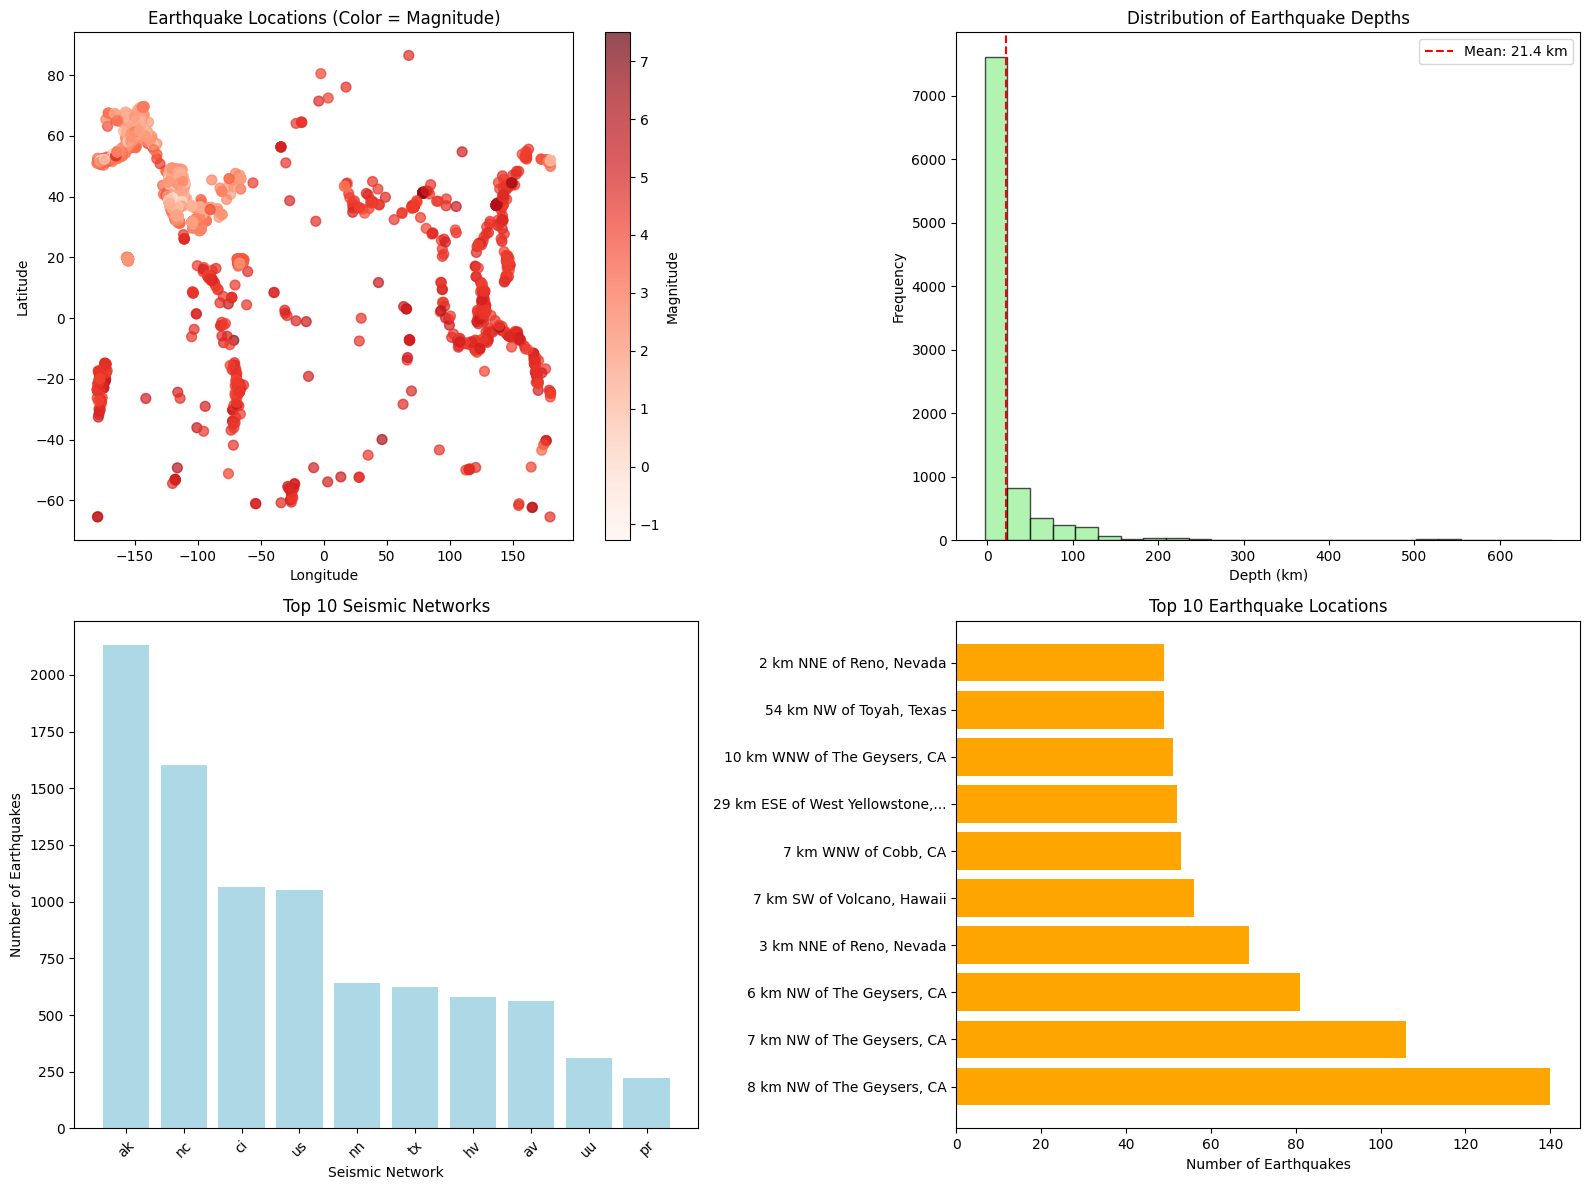

GEOGRAPHIC STATISTICS: 
Latitude Range: -65.436° to 86.513°
Longitude Range: -179.969° to 179.997°
Depth Range: -3.2 - 660.8 km
Average Depth: 21.4 km

Top 5 Most Active Locations:
place
8 km NW of The Geysers, CA    140
7 km NW of The Geysers, CA    106
6 km NW of The Geysers, CA     81
3 km NNE of Reno, Nevada       69
7 km SW of Volcano, Hawaii     56
Name: count, dtype: int64


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

scatter = axes[0,0].scatter(cleaned_data['longitude'], cleaned_data['latitude'], 
                           c=cleaned_data['mag'], cmap='Reds', alpha=0.7, s=50)
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Earthquake Locations (Color = Magnitude)')
plt.colorbar(scatter, ax=axes[0,0], label='Magnitude')

axes[0,1].hist(cleaned_data['depth'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_xlabel('Depth (km)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Earthquake Depths')
axes[0,1].axvline(cleaned_data['depth'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {cleaned_data["depth"].mean():.1f} km')
axes[0,1].legend()

network_counts = cleaned_data['net'].value_counts().head(10)
axes[1,0].bar(network_counts.index, network_counts.values, color='lightblue')
axes[1,0].set_xlabel('Seismic Network')
axes[1,0].set_ylabel('Number of Earthquakes')
axes[1,0].set_title('Top 10 Seismic Networks')
axes[1,0].tick_params(axis='x', rotation=45)

place_counts = cleaned_data['place'].value_counts().head(10)
axes[1,1].barh(range(len(place_counts)), place_counts.values, color='orange')
axes[1,1].set_yticks(range(len(place_counts)))
axes[1,1].set_yticklabels([place[:30] + '...' if len(place) > 30 else place for place in place_counts.index])
axes[1,1].set_xlabel('Number of Earthquakes')
axes[1,1].set_title('Top 10 Earthquake Locations')

plt.tight_layout()
plt.show()

print("GEOGRAPHIC STATISTICS: ")
print(f"Latitude Range: {cleaned_data['latitude'].min():.3f}° to {cleaned_data['latitude'].max():.3f}°")
print(f"Longitude Range: {cleaned_data['longitude'].min():.3f}° to {cleaned_data['longitude'].max():.3f}°")
print(f"Depth Range: {cleaned_data['depth'].min():.1f} - {cleaned_data['depth'].max():.1f} km")
print(f"Average Depth: {cleaned_data['depth'].mean():.1f} km")

print(f"\nTop 5 Most Active Locations:")
print(cleaned_data['place'].value_counts().head())

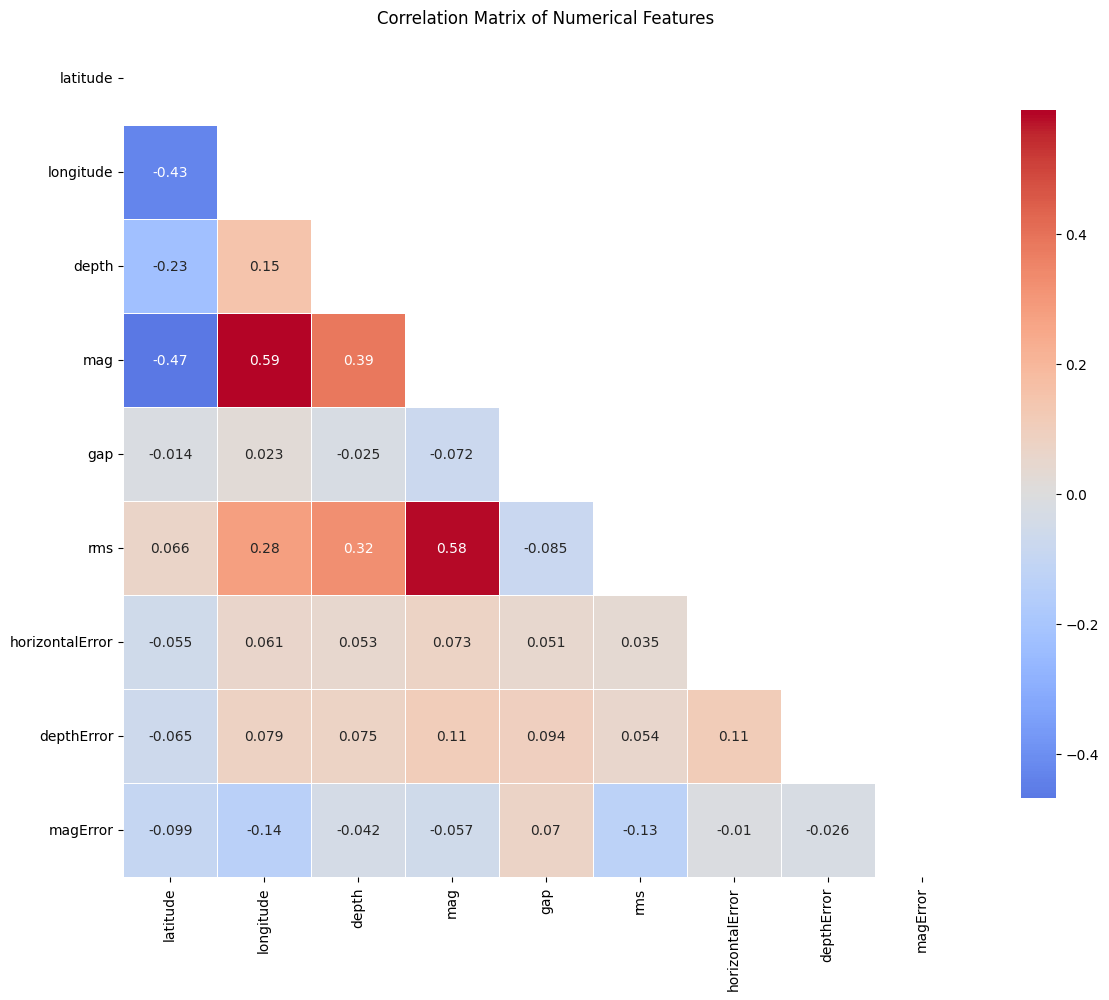

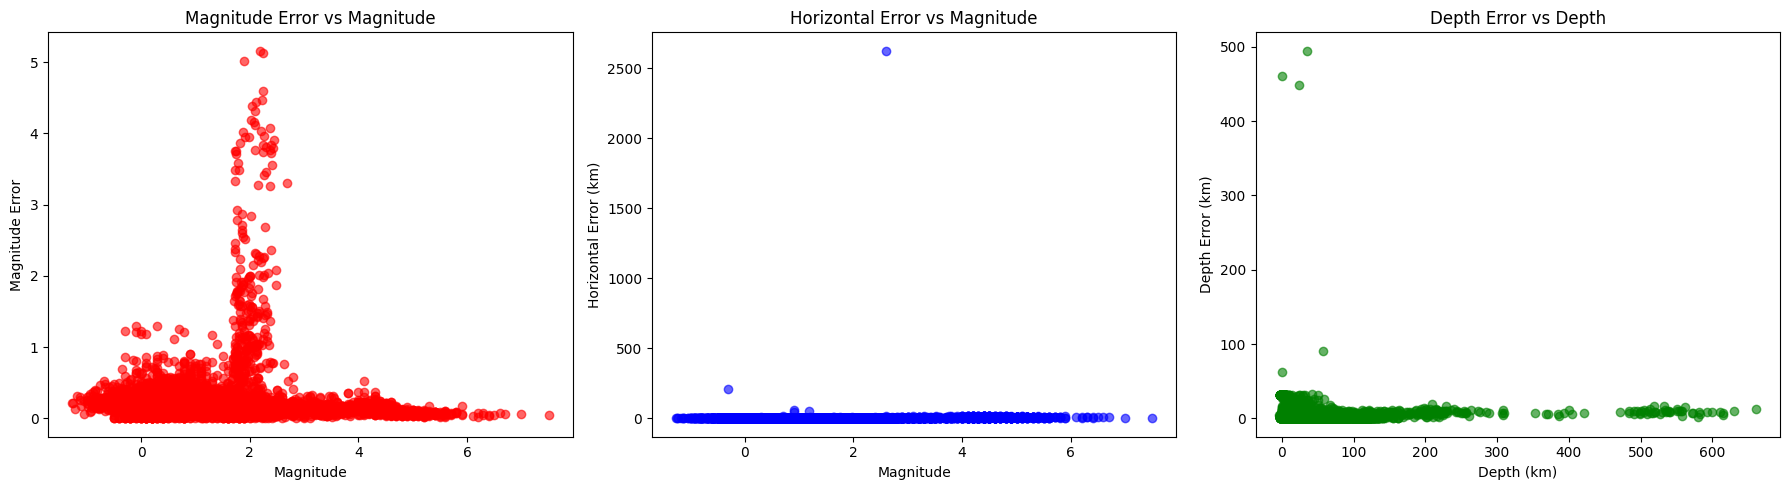

STRONG CORRELATIONS (|r| > 0.3): 
longitude - mag: 0.591
mag - rms: 0.582
latitude - mag: -0.469
latitude - longitude: -0.430
depth - mag: 0.387
depth - rms: 0.323


In [11]:
numerical_cols = ['latitude', 'longitude', 'depth', 'mag', 'gap', 'rms', 'horizontalError', 'depthError', 'magError']
correlation_data = cleaned_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(cleaned_data['mag'], cleaned_data['magError'], alpha=0.6, color='red')
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Magnitude Error')
axes[0].set_title('Magnitude Error vs Magnitude')

axes[1].scatter(cleaned_data['mag'], cleaned_data['horizontalError'], alpha=0.6, color='blue')
axes[1].set_xlabel('Magnitude')
axes[1].set_ylabel('Horizontal Error (km)')
axes[1].set_title('Horizontal Error vs Magnitude')

axes[2].scatter(cleaned_data['depth'], cleaned_data['depthError'], alpha=0.6, color='green')
axes[2].set_xlabel('Depth (km)')
axes[2].set_ylabel('Depth Error (km)')
axes[2].set_title('Depth Error vs Depth')

plt.tight_layout()
plt.show()

print("STRONG CORRELATIONS (|r| > 0.3): ")
correlation_pairs = []
for i in range(len(correlation_data.columns)):
    for j in range(i+1, len(correlation_data.columns)):
        corr_val = correlation_data.iloc[i, j]
        if abs(corr_val) > 0.3:
            correlation_pairs.append((correlation_data.columns[i], correlation_data.columns[j], corr_val))

for col1, col2, corr in sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{col1} - {col2}: {corr:.3f}")


In [ ]:
conn = sqlite3.connect('../data/earthquake_data.db')
cleaned_data.to_sql('earthquakes', conn, if_exists='replace', index=False)
print("Data successfully loaded into SQLite database: earthquake_data.db")

queries = {
    "Daily Summary": """
        SELECT date, 
               COUNT(*) as earthquake_count,
               ROUND(AVG(mag), 2) as avg_magnitude,
               MAX(mag) as max_magnitude,
               ROUND(AVG(depth), 1) as avg_depth
        FROM earthquakes 
        GROUP BY date 
        ORDER BY date
    """,
    
    "Geographic Hotspots": """
        SELECT place,
               COUNT(*) as earthquake_count,
               ROUND(AVG(mag), 2) as avg_magnitude,
               MAX(mag) as max_magnitude
        FROM earthquakes 
        GROUP BY place 
        HAVING earthquake_count > 1
        ORDER BY earthquake_count DESC
        LIMIT 10
    """,
    
    "Network Performance": """
        SELECT net,
               COUNT(*) as earthquake_count,
               ROUND(AVG(mag), 2) as avg_magnitude,
               ROUND(AVG(magError), 3) as avg_mag_error
        FROM earthquakes 
        GROUP BY net 
        ORDER BY earthquake_count DESC
    """
}

for query_name, query in queries.items():
    print(f"\n{query_name.upper()}")
    result = pd.read_sql_query(query, conn)
    print(result)

conn.close()

Data successfully loaded into SQLite database: earthquake_data.db

DAILY SUMMARY
          date  earthquake_count  avg_magnitude  max_magnitude  avg_depth
0     1/1/2024               432           1.75            7.5       21.7
1    1/10/2024               243           1.47            5.0       19.1
2    1/11/2024               229           1.58            6.4       28.4
3    1/12/2024               222           1.74            5.9       22.0
4    1/13/2024               280           1.64            5.2       18.8
5    1/14/2024               242           1.50            5.2       28.0
6    1/15/2024               285           1.58            5.2       24.0
7    1/16/2024               267           1.45            5.0       20.0
8    1/17/2024               262           1.56            5.6       19.5
9    1/18/2024               316           1.45            6.4       18.1
10   1/19/2024               343           1.55            5.6       16.9
11    1/2/2024               31

In [19]:
print("EARTHQUAKE DATA ANALYSIS SUMMARY")

print(f"DATASET OVERVIEW:")
print(f"   • Time Period: {cleaned_data['date'].min()} to {cleaned_data['date'].max()}")
print(f"   • Total Earthquakes: {len(cleaned_data):,}")
print(f"   • Geographic Coverage: USA (Lat: {cleaned_data['latitude'].min():.1f}° to {cleaned_data['latitude'].max():.1f}°)")
print(f"   • Monitoring Networks: {cleaned_data['net'].nunique()} networks")

print(f"\nMAGNITUDE INSIGHTS:")
print(f"   • Magnitude Range: {cleaned_data['mag'].min():.1f} - {cleaned_data['mag'].max():.1f}")
print(f"   • Average Magnitude: {cleaned_data['mag'].mean():.2f}")
print(f"   • Most Common Mag Type: {cleaned_data['magType'].mode()[0]} ({(cleaned_data['magType'] == cleaned_data['magType'].mode()[0]).sum()} earthquakes)")
print(f"   • High Magnitude (>4.0): {(cleaned_data['mag'] > 4.0).sum()} earthquakes")

most_active_place = cleaned_data['place'].value_counts().index[0]
most_active_count = cleaned_data['place'].value_counts().iloc[0]
print(f"\nGEOGRAPHIC INSIGHTS:")
print(f"   • Most Active Location: {most_active_place} ({most_active_count} earthquakes)")
print(f"   • Average Depth: {cleaned_data['depth'].mean():.1f} km")
print(f"   • Deepest Earthquake: {cleaned_data['depth'].max():.1f} km")
print(f"   • Shallowest Earthquake: {cleaned_data['depth'].min():.1f} km")

print(f"\nDATA QUALITY:")
print(f"   • Completeness: {((1 - cleaned_data.isnull().sum().sum() / (len(cleaned_data) * len(cleaned_data.columns))) * 100):.1f}%")
print(f"   • Average Magnitude Error: {cleaned_data['magError'].mean():.3f}")
print(f"   • Average Horizontal Error: {cleaned_data['horizontalError'].mean():.2f} km")

EARTHQUAKE DATA ANALYSIS SUMMARY
DATASET OVERVIEW:
   • Time Period: 1/1/2024 to 12/31/2023
   • Total Earthquakes: 9,451
   • Geographic Coverage: USA (Lat: -65.4° to 86.5°)
   • Monitoring Networks: 15 networks

MAGNITUDE INSIGHTS:
   • Magnitude Range: -1.3 - 7.5
   • Average Magnitude: 1.63
   • Most Common Mag Type: ml (6092 earthquakes)
   • High Magnitude (>4.0): 880 earthquakes

GEOGRAPHIC INSIGHTS:
   • Most Active Location: 8 km NW of The Geysers, CA (140 earthquakes)
   • Average Depth: 21.4 km
   • Deepest Earthquake: 660.8 km
   • Shallowest Earthquake: -3.2 km

DATA QUALITY:
   • Completeness: 100.0%
   • Average Magnitude Error: 0.226
   • Average Horizontal Error: 1.63 km
